# 1.2.3: Bike Share (Iteration)

<br>



---



*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br> 



---



We've done our investigation, abstraction, and even implementation.  So we now have a functioning code.   But it's not perfect yet, so now we enter the validation-iteration-implementation feedback loop.  

<br>

In this notebook, we'll consider two ways to improve the model by iteration:

* improving an already functioning simulation by streamlining our code  
* improving the substance of the model.

In [ ]:
# Import libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
import pandas as pd
import numpy as np


Downloaded ModSimPy_Functions/modsim.py




---



## Improving the Code

Part of iteration involves building stronger code.  Let's make a few changes to the code from the
previous chapter. First we'll generalize the functions we wrote so they
take a state `Series` object as a parameter. Then, we'll make the code more
readable by adding documentation.


### Adding flexibility to functions through generalization

Here is one of the functions from the previous chapter, `bike_to_moline`:

In [ ]:
def bike_to_moline():
    bikeshare.augie -= 1
    bikeshare.moline += 1

When this function is called, it modifies a particular object called `bikeshare`. As long as there
is only one state object, that's fine.  But what if there is more than
one bike share system in the world? Or what if we want to run more than
one simulation?

<br>

We want to be able to use this function with any `bikeshare`-like object.  We can do this by allowing it to take a `Series` object as a
parameter. Here's what that looks like:

In [ ]:
def bike_to_moline(state):
    state.augie -= 1
    state.moline += 1

The name of the parameter is `state`, rather than `bikeshare`, as a
reminder that the value of `state` could be any state `Series` object, not just the one we called `bikeshare`.

<br>

This version of `bike_to_moline` requires a `Series` object as a
parameter, so we have to provide one when we call it:

In [ ]:
bikeshare = pd.Series(dict(augie=10,moline=2),name="Number of Bikes")
bike_to_moline(bikeshare)

Again, the argument we provide gets assigned to the parameter, so this
function call has the same effect as:

```
state = bikeshare 
state.augie -= 1 
state.moline += 1
```

Now we can create as many `State` objects as we want:

In [ ]:
bikeshare1 = pd.Series(dict(augie=10,moline=2),name="Number of Bikes")
bikeshare2 = pd.Series(dict(augie=2,moline=10),name="Number of Bikes")

And update them independently:

In [ ]:
bike_to_moline(bikeshare1)
bike_to_moline(bikeshare2)
pd.DataFrame(bikeshare2)

,Number of Bikes
augie,1
moline,11


Changes in `bikeshare1` do not affect `bikeshare2`, and vice versa. So
we can simulate different bike share systems, or run multiple
simulations of the same system.  This process is called 'generalizing' a function.

### Clarifying the code with documentation



Another problem with the code we have so far is that it contains no
*documentation*.
Documentation is text we add to a program to help
other programmers read and understand it. It has no effect on the
program when it runs.

<br>

There are two kinds of documentation, *docstrings* and *comments*:

* A docstring is a string in triple quotes that appears at the beginning of a function.

* A comment is a line of text that begins with a hash symbol, `#`.

Here's a version of `bike_to_augie` with a docstring and a comment.

In [ ]:
def bike_to_augie(state):
    """Move one bike from Moline to Augustana.
    
    state: bikeshare State object
    """
    # We decrease one state variable and increase the
    # other so the total number of bikes is unchanged.
    state.moline -= 1
    state.augie += 1

Docstrings follow a conventional format:

-   The first line is a single sentence that describes what the function does.

-   The following lines explain what the parameters are.

A function's docstring should include the information someone needs to
know to *use* the function; it should not include details about how the function works.

<br>

Comments provide details about how the function works, especially if there is something that would not be obvious to someone reading the program.

✅ ✅ In the cell below is the change function we defined in the previous notebook.  Add documentation to the function by adding a docstring and at least two inline comments:

In [ ]:
def change_func(p1, p2):
    if flip(p1):
        bike_to_moline()
    
    if flip(p2):
        bike_to_augie()

---

## Improving the Model

We've made some improvements to our code.  Let's turn to the more substantive issues.  The model we have so far is simple, but it is based on unrealistic
assumptions. What weaknesses did you identify in the exercises for the previous notebook?

<br>

Here are some of the weaknesses you might have found:

-   In the model, a student is equally likely to arrive during any
    15-minute period. In reality, this probability varies depending on time of day, day of the week, etc.

-   The model does not account for travel time from one bike station to another.

-   The model does not allow more than one student to arrive in a given 15-minute period.

-   The model does not check whether a bike is available, so it's
    possible for the number of bikes to be negative (as you might have
    noticed in some of your simulations).

Some of these modeling decisions are better than others:
* the first assumption might be reasonable if we simulate the system for a short period of time, like one hour.
* the second and third assumptions are not very realistic, but they might not affect the results very much, depending on what we use the model for.

* the last assumption seems problematic, and it is
relatively easy to fix. In this chapter, we will.

This process, starting with a simple model, identifying the most
important problems, and making gradual improvements, is called
*iterative modeling*. It often takes several
iterations to develop a model that is good enough for the intended
purpose, but no more complicated than necessary.

### Eliminating Negative Bikes

Currently the simulation does not check whether a bike is available when a customer arrives, so the number of bikes at a location can be
negative. That's not very realistic Here's a version of `bike_to_augie` that fixes the problem:

In [ ]:
def bike_to_augie(state):
    if state.moline == 0:
        return
    state.moline -= 1
    state.augie += 1

The first line checks whether the number of bikes at Moline is zero. If so, it uses a *return statement*, which causes the function to end immediately, without running the rest of the statements. So if there are no bikes at Moline, we return from `bike_to_augie` without changing the state.

<br>

✅ ✅ Add documentation to the bike_to_augie function above.

<br>

We can test it by initializing a state with no bikes at Moline and calling `bike_to_augie`.

In [ ]:
bikeshare = pd.Series(dict(augie=12,moline=0),name="Number of Bikes")
bike_to_augie(bikeshare)

The state of the system should be unchanged.

In [ ]:
pd.DataFrame(bikeshare)

,Number of Bikes
augie,12
moline,0


No more negative bikes (at least at Moline).

#### Comparison Operators

The updated version of `bike_to_augie` uses the equals operator, `==`, which compares two values and returns `True`, if they are equal, and `False` otherwise.

<br>

It is easy to confuse the equals operator with the assignment operator, `=`, which assigns a value to a variable. For example, the following statement creates a variable, `x`, if it doesn't already exist, and gives it the value `5`.

In [ ]:
x = 5
x

5

On the other hand, the following statement checks whether `x` is `5` and
returns `True` or `False`. It does not create `x` or change its value.

In [ ]:
x == 5

True

You can use the equals operator in an `if` statement, like this:

In [ ]:
if x == 5:
    print('yes, x is 5')

yes, x is 5


If you make a mistake and use `=` in an `if` statement, like this:

```
if x = 5:
    print('yes, x is 5')
```

That's a *syntax error*, which means that the structure of the program is invalid. Python will print an error message and the program won't run.

The equals operator is one of Python's *comparison operators*. The others
are:

| Operation             	| Symbol 	|
|-----------------------	|--------	|
| Less than             	| `<`      	|
| Greater than          	| `>`      	|
| Less than or equal    	| `<=`     	|
| Greater than or equal 	| `>=`     	|
| Equal                 	| `==`     	|
| Not equal             	| `!=`     	|

<br>

---

## Interpretation: Using 'metrics'

So we've improved our model by iterating.Remember now that our aim is to *optimize* this system: to find the ideal number of bikes to put at Augie at the beginning of the day.  This is one form of the last step of the modeling process: interpretation of the model.

<br>

In order to optimize, we need to define an 'ideal' system in a way that can be quantified.  The way we do this is with a *metric*.

<br>

Maybe we don't like angry customers, so we might want to minimize the number of customers who show up to get a bike but don't find one.  Or maybe if we are charging a fee to use the bike, we want to maximize the number of bikes that get used in one day.  

<br>

Notice that these are not necessarily the same thing: one metric might favor one set-up while another favors a different set up.  So it's important to choose a metric carefully.

<br>

Let's assume this is a public service rather than a money-making scheme, though, and focus on the measure the number of unhappy customers.
Here's a version of `bike_to_augie` that keeps track of the number of
customers who arrive at a station with no bikes:

In [ ]:
def bike_to_augie(state):
    if state.moline == 0:
        state.moline_empty += 1
        return
    state.moline -= 1
    state.augie += 1

If a customer arrives at the Moline station and finds no bike
available, `bike_to_augie` updates `moline_empty`, which counts the
number of unhappy customers.  Notice that we've added a new attribute to `state`: this function will return an error unless we initialize `moline_empty` when we
create the state object, like this:

In [ ]:
bikeshare = pd.Series(dict(augie=12,moline=0,moline_empty=0),name="Number of Bikes")

We can test it by calling `bike_to_augie`:

In [ ]:
bike_to_augie(bikeshare)

After this update, there should be 12 bikes at Augustana, no bikes at Moline, and one unhappy customer.

In [ ]:
pd.DataFrame(bikeshare)

,Number of Bikes
augie,12
moline,0
moline_empty,1


Looks good!

<br>



---



## Summary and Exercises

In this chapter, we wrote several versions of `bike_to_augie`:

* We added a parameter, `state`, so we can work with more than one state object.

* We added a docstring that explains how to use the function and a comment that explains how it works.

* We used a conditional operator, `==`, to check whether a bike is available, in order to avoid negative bikes.

* We added a state variable, `moline_empty`, to count the number of unhappy customers, which is a metric we'll use to quantify how well the system works.

In the exercises, you'll update `bike_to_moline` the same way and test it by running a simulation.

<br>



---



### Code repository

Here's the code we have so far, with docstrings, all in one place.

In [ ]:
def run_simulation(state,p1,p2,num_steps):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an Augustana-> Moline customer arrival
    p2: probability of a Moline-> Augustana customer arrival
    num_steps: number of time steps
    """
    results = pd.Series([],dtype=object)
    results.name = 'Number of Bikes at Augie'
    results.index.name = 'Time Step'
    results[0] = state.augie
    
    for i in range(num_steps):
        change_func(state,p1,p2)
        results[i+1] = state.augie
    results.plot(xlabel=results.index.name, ylabel=results.name,
            title='Augie-Moline Bikeshare',
            legend=True);

In [ ]:
def change_func(state, p1, p2):
    """Simulate one time step.
    
    state: bikeshare State object
    p1: probability of an Augustana->Moline ride
    p2: probability of a Moline->Augustana ride
    """
    if flip(p1):
        bike_to_moline(state)
    
    if flip(p2):
        bike_to_augie(state)

In [ ]:
def bike_to_augie(state):
    """Move one bike from Moline to Augustana.
    
    state: bikeshare State object
    """
    if state.moline == 0:
        state.moline_empty += 1
        return
    state.moline -= 1
    state.augie += 1

In [ ]:
def bike_to_moline(state):
    """Move one bike from Augustana to Moline.
    
    state: bikeshare State object
    """
    state.augie -= 1
    state.moline += 1

### Exercise 1

✅ ✅ Add an inline comment (with #) above each of the lines of code in the run_simulation function above.  Each comment should explain what that line does.  Each comment should be "greyed out" and will not affect how the function runs.

### Exercise 2

✅ ✅ Modify `bike_to_moline` so it checks whether a bike is available at Augustana.  If not, it should add one to `augie_empty`.  To test it, create a `State` that initializes `augie` and `augie_empty` to `0`, run `bike_to_moline`, and check the result.

In [1]:
# Define new bike_to_moline


In [ ]:
# Test function


### Exercise 3

✅ ✅ Now run the simulation with parameters `p1=0.5`, `p2=0.4`, and `num_steps=60` (that is, 15 hours), and confirm that the number of bikes is never negative.

Start with this initial state listed below.  You may need to use a higher value for num_steps to check the solution.

In [ ]:
# This is the initial state
bikeshare = pd.Series(dict(augie=10,moline=2,augie_empty=0,
                           moline_empty=0),name="Number of Bikes")

,Number of Bikes
augie,6
moline,6
augie_empty,0
moline_empty,0


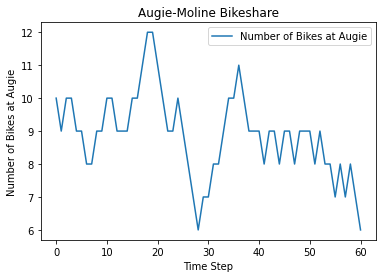

In [ ]:
# Test run_simulation
run_simulation(bikeshare, 0.5, 0.4, 60)
pd.DataFrame(bikeshare)

### Exercise 4

✅ ✅ As another metric, we might be interested in the time until the first customer arrives and doesn't find a bike.  To make that work, we have to add a "clock" to keep track of how many time steps have elapsed:

1. Create a new state object with an additional state variable, `clock`, initialized to 0. 

2. Write a modified version of `change_func` that adds one to the clock each time it is invoked.

Test your code by running the simulation and check the value of `clock` at the end.

In [ ]:
# Create a state object


In [ ]:
# Write a modified version of "change_func".  Here is the current one:

def change_func(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Augustana->Moline customer arrival
    p2: probability of a Moline->Augustana customer arrival
    """
    
    if flip(p1):
        bike_to_moline(state)
    
    if flip(p2):
        bike_to_augie(state)

In [ ]:
# Run the new simulation and print out bikeshare's variables



### Exercise 5

✅ ✅ Continuing the previous exercise, let's record the time when the first customer arrives and doesn't find a bike.

1. Create a new state object with an additional state variable, `t_first_empty`, initialized to -1 as a special value to indicate that it has not been set. 

2. Write a modified version of `change_func` that checks whether`augie_empty` and `moline_empty` are 0.  If not, it should set `t_first_empty` to `clock` (but only if `t_first_empty` has not already been set).

Test your code by running the simulation and printing the values of augie_empty, moline_empty, and t_first_empty at the end.


In [ ]:
# Create a state object 'bikeshare' but now with 6 state variables
bikeshare = 

SyntaxError: ignored

In [ ]:
# Rewrite 'change_func' as described.  Here is the original form:

def change_func(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Augustana->Moline customer arrival
    p2: probability of a Moline->Augustana customer arrival
    """
    
    if flip(p1):
        bike_to_moline(state)
    
    if flip(p2):
        bike_to_augie(state)
        


In [ ]:
# Run the new simulation and print out bikeshare's variables
# Does the value for 't_first_empty' make sense with the plot?